# Impedance Matching simulation
- https://en.wikipedia.org/wiki/Impedance_matching
- https://en.wikipedia.org/wiki/Standing_wave_ratio
- https://www.youtube.com/watch?v=kOy0afN6lTs
- https://www.youtube.com/watch?v=BijMGKbT0Wk 
- https://zh.wikipedia.org/wiki/%E5%8F%B2%E5%AF%86%E6%96%AF%E5%9B%BE


In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import * 

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
from ipywidgets import interactive

# interactive(process, amp_I = (0, 1, 1/4), amp_Q = (0, 1, 1/4))

In [7]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

## Test Circuit

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Source_and_load_circuit_Z_%282%29.svg/330px-Source_and_load_circuit_Z_%282%29.svg.png)

### Zo 固定的情況下 改變 Zl，Zl 為多少的時候，會獲得最大功率?
- 當 Zl == Zo 的時候，Zl 會獲得最大的功率，且等同於源頭本身所消耗的功率，即 Wo == Wl
- Zl 越大，整體 (Zo + Zl) 功率越小
- Zl 越小，整體 (Zo + Zl) 功率越大
- Zl 就像一個 整體功率的限制器

In [8]:
Vs = 66

Max Wl=21.78 @ Zl=50.05


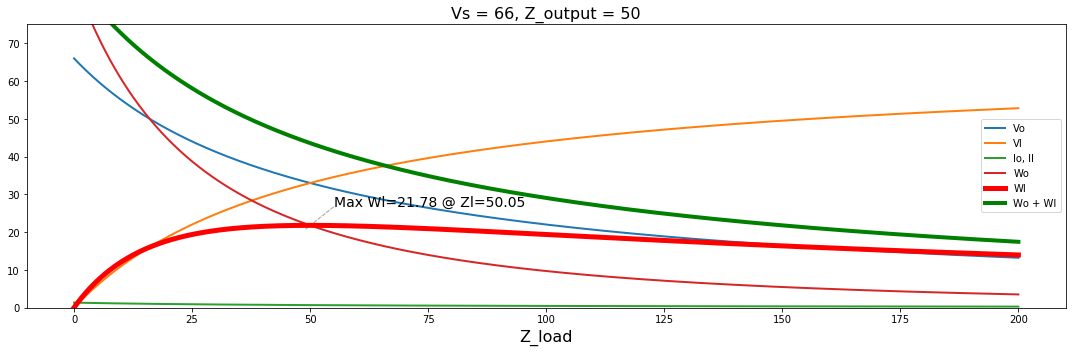

In [9]:
def get_wave(Zo = 50,
             Vs = Vs, 
             Zl_min = 1e-6, 
             Zl_max = 200, 
             steps = 1000): 
     
    Zl = np.linspace(Zl_min, Zl_max, steps)        
    Vo = Vs * (Zo / (Zo + Zl))
    Vl = Vs * (Zl / (Zo + Zl))   
    Io = Vo / Zo   
    Il = Vl / Zl 
    Wo = Io**2 * Zo
    Wl = Il**2 * Zl
    
    idx = np.argmax(Wl)
    Zl_optimal = Zl[idx]
    
    return Zl, Zo, Vo, Vl, Io, Il, Wo, Wl, Zl_optimal

    
def plot(Zl, Zo, Vo, Vl, Io, Il, Wo, Wl):    
    
    idx = np.argmax(Wl)
    print('Max Wl={:0.2f} @ Zl={:0.2f}'.format(Wl[idx], Zl[idx]))
    
    plt.figure(figsize = (15, 5))
    
    plt.plot(Zl, Vo, linewidth = 2, label = 'Vo')#, color = 'red')  
    plt.plot(Zl, Vl, linewidth = 2, label = 'Vl')#, color = 'red')  
    plt.plot(Zl, Io, linewidth = 2, label = 'Io, Il')#, color = 'red')  
    plt.plot(Zl, Wo, linewidth = 2, label = 'Wo')#, color = 'red')  
    plt.plot(Zl, Wl, linewidth = 5, label = 'Wl', color = 'red')  
    plt.plot(Zl, Wo + Wl, linewidth = 4, label = 'Wo + Wl', color = 'green') 
    
    annotate_xy = (Zl[idx] + 5, Wl[idx] + 5)
    arrow_xy = (-5, -5)
    plt.annotate('Max Wl={:0.2f} @ Zl={:0.2f}'.format(Wl[idx], Zl[idx]), annotate_xy, fontsize = 14)
    plt.arrow(*annotate_xy, *arrow_xy, linestyle = '--', color = 'grey', alpha = 0.5, head_length = 1.5)
    
    plt.ylim((0, 75))
    plt.title('Vs = {}, Z_output = {}'.format(Vs, Zo), fontsize = 16)
    plt.xlabel('Z_load', fontsize = 16) 
    plt.legend()
    plt.tight_layout() 
    

Zl, Zo, Vo, Vl, Io, Il, Wo, Wl, _ = get_wave(Zo = 50)#, Zl_max = 1000)
plot(Zl, Zo, Vo, Vl, Io, Il, Wo, Wl)

### Zl == Zo 的時候，Zl 會獲得最大的功率，是否對任何 Zo 都適用 ?
- Yes !!!
- 當 Zl == Zo 的時候，Zl 會獲得最大的功率

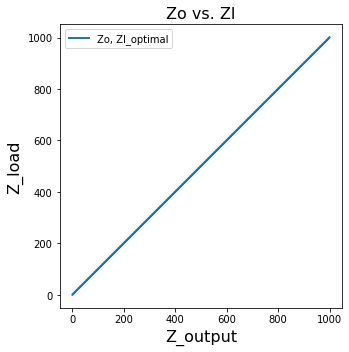

In [10]:
def get_Zl_optimal(Vs = Vs, 
                   Zo_min = 1e-6, 
                   Zo_max = 1000, 
                   steps = 1000): 
     
    Zo = np.linspace(Zo_min, Zo_max, steps)  
    Zl_optimal = []
    
    for z in Zo:
        Zl, _, Vo, Vl, Io, Il, Wo, Wl, Zl_opti = get_wave(Zo = z, Zl_max = Zo_max * 2)
        Zl_optimal.append(Zl_opti)
    
    return Zo, Zl_optimal

    
def plot_Zl_optimal(Zo, Zl_optimal):
    
    plt.figure(figsize = (5, 5))
    
    plt.plot(Zo, Zl_optimal, linewidth = 2, label = 'Zo, Zl_optimal')  
    
    plt.gca().set_aspect('equal')
    plt.title('Zo vs. Zl', fontsize = 16)
    plt.xlabel('Z_output', fontsize = 16) 
    plt.ylabel('Z_load', fontsize = 16) 
    plt.legend()
    plt.tight_layout() 
    

Zo, Zl_optimal = get_Zl_optimal()
plot_Zl_optimal(Zo, Zl_optimal)